# Unsupervised Learning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. Clustering

### K-Means

In [2]:
from sklearn.cluster import KMeans

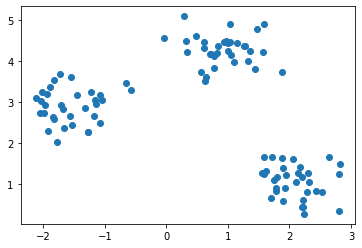

In [3]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1]);

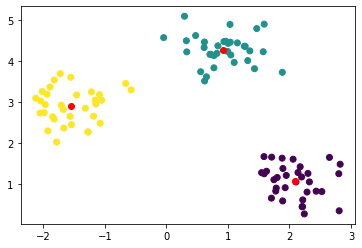

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r');

### Elbow Method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


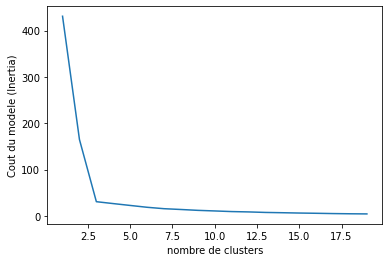

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    
plt.figure()
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.show()

## 2. Anomaly detection

### Isolation Forest

In [6]:
from sklearn.ensemble import IsolationForest

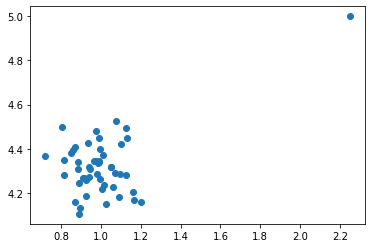

In [7]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1]);

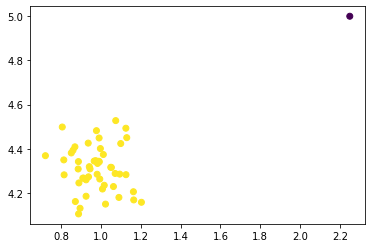

In [8]:
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X));

### Application : Digits Outliers

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

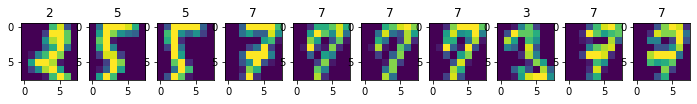

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## Dimensionality reduction

### PCA

#### Visualisation 2D

In [11]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

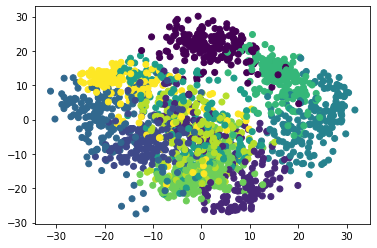

In [12]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y);

choose the best dimension

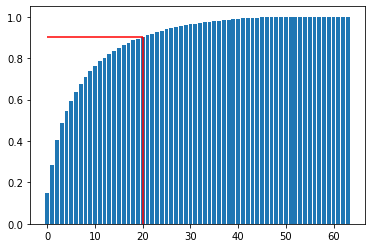

In [13]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r');